In [126]:
import pandas
import datetime as dt
import japanize_matplotlib

In [127]:
corona=pandas.read_csv('corona.csv')
corona=corona[['番号','年代','性別','居住地','発症日','判明日','その他（＊）']]
corona=corona[corona['番号']!='※居住地にかかわらず、感染症の予防及び感染症の患者に対する医療に関する法律に基づき、栃木県及び宇都宮市に届け出のあった患者について掲載しています。（他県や検疫所に届け出があった患者は、他県等で公表されます。）\n※患者・御家族の人権尊重・個人情報保護に御理解と御配慮をお願いします。\n※退院日等の「退院」には、感染症法上の入院勧告等の解除及び県外保健所への入院等の対応依頼を含みます。\n(＊) 陽性者との接触の有無、感染に関与すると考えられる行動歴等  ']
corona

,番号,年代,性別,居住地,発症日,判明日,その他（＊）
0,10781,30代,女性,宇都宮市,調査中,8月18日,※宇都宮市4002例目
1,10780,10代,女性,宇都宮市,調査中,8月18日,※宇都宮市4001例目
2,10779,10代,女性,宇都宮市,調査中,8月18日,10783･10784例目の家族\n※宇都宮市4000例目
3,10778,10代,女性,宇都宮市,調査中,8月18日,10783･10785例目の家族\n※宇都宮市3999例目
4,10777,40代,男性,宇都宮市,調査中,8月18日,10784･10785例目の家族\n※宇都宮市3998例目
...,...,...,...,...,...,...,...
10790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1>全体データ</h1>

In [128]:
corona=corona.dropna(how='all')
corona = corona.dropna(axis=0, subset=['番号'])
corona[corona['番号'].isnull()]
corona=corona[corona['番号']!=' ']
corna=corona.reset_index()
corona['番号']=corona['番号'].astype(int)
#1483より前は昨年
#一旦調査中のデータを抜く
corona['day']=''
corona=corona[corona['判明日']!='調査中']
corona=corona[corona['判明日']!='現在調査中']
corona['判明日']=pandas.to_datetime(corona['判明日'], format='%m月%d日')
corona['day']=corona['判明日'].dt.strftime('%m-%d')

ValueError: time data '現在調査中' does not match format '%m月%d日' (match)

<h2>月別コロナ数推移</h2>
<pre>
現状, 発症日をベースにすると調査中のデータが多い為判明日をベースにカウントする.
※発症数をcountで取る.
</pre>

<AxesSubplot:xlabel='判明日'>

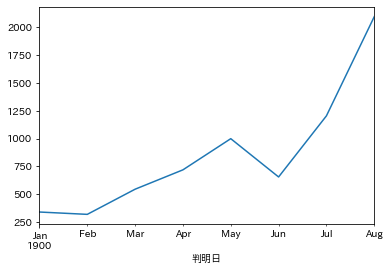

In [ ]:
corona.groupby(pandas.Grouper(key='判明日', freq='M')).count()['発症日'].plot()

In [ ]:
corona.groupby(pandas.Grouper(key='判明日', freq='M')).count()['発症日']

判明日
1900-01-31     340
1900-02-28     319
1900-03-31     545
1900-04-30     719
1900-05-31     999
1900-06-30     655
1900-07-31    1204
1900-08-31    2095
Freq: M, Name: 発症日, dtype: int64

<h2>居住地についての可視化</h2>
<pre>
多い順に10件に絞って可視化する.
</pre>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

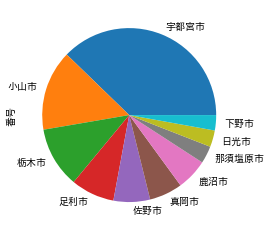

In [ ]:
corona_place=corona.groupby('居住地').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_place.plot.pie(subplots=True)

In [ ]:
corona_place

居住地
宇都宮市     2177
小山市       862
栃木市       651
足利市       467
佐野市       392
真岡市       355
鹿沼市       335
那須塩原市     186
日光市       178
下野市       164
Name: 番号, dtype: int64

<h2>年齢についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

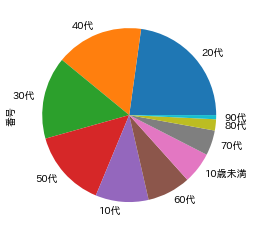

In [ ]:
corona_nen=corona.groupby('年代').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_nen.plot.pie(subplots=True)

In [ ]:
corona_nen

年代
20代      1565
40代      1115
30代      1050
50代       986
10代       676
60代       553
10歳未満     400
70代       320
80代       143
90代        53
Name: 番号, dtype: int64

<h2>性別についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

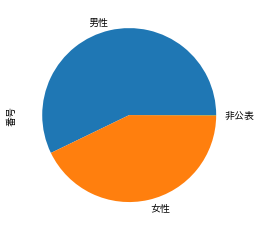

In [ ]:
corona_sei=corona.groupby('性別').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_sei.plot.pie(subplots=True)

In [ ]:
corona_sei

性別
男性     3931
女性     2941
非公表       4
Name: 番号, dtype: int64

<h2>日別コロナ数推移</h2>
<pre>
現状, 発症日をベースにすると調査中のデータが多い為判明日をベースにカウントする.
※発症数をcountで取る.
</pre>

<AxesSubplot:xlabel='判明日'>

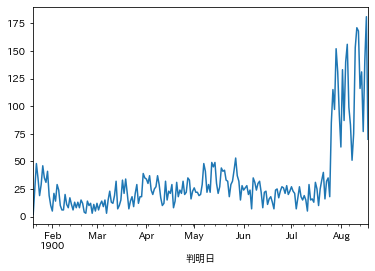

In [ ]:
corona.groupby(pandas.Grouper(key='判明日', freq='D')).count()['発症日'].plot()

In [ ]:
corona.groupby(pandas.Grouper(key='判明日', freq='D')).count()['発症日']

判明日
1900-01-20      2
1900-01-21     25
1900-01-22     48
1900-01-23     35
1900-01-24     19
             ... 
1900-08-14    131
1900-08-15     77
1900-08-16    141
1900-08-17    181
1900-08-18     70
Freq: D, Name: 発症日, Length: 211, dtype: int64

<h1>今月のデータ</h1>

In [ ]:
dt_now = dt.datetime.now()
if dt_now.month<10:
    corona_today=corona[corona['day'].str.startswith('0'+str(dt_now.month))]
else:
    corona_today=corona[corona['day'].str.startswith(str(dt_now.month))]
corona_today

,番号,年代,性別,居住地,発症日,判明日,その他（＊）,day
0,10781,30代,女性,宇都宮市,調査中,1900-08-18,※宇都宮市4002例目,08-18
1,10780,10代,女性,宇都宮市,調査中,1900-08-18,※宇都宮市4001例目,08-18
2,10779,10代,女性,宇都宮市,調査中,1900-08-18,10783･10784例目の家族\n※宇都宮市4000例目,08-18
3,10778,10代,女性,宇都宮市,調査中,1900-08-18,10783･10785例目の家族\n※宇都宮市3999例目,08-18
4,10777,40代,男性,宇都宮市,調査中,1900-08-18,10784･10785例目の家族\n※宇都宮市3998例目,08-18
...,...,...,...,...,...,...,...,...
2423,8358,10歳未満,女性,真岡市,7月28日,1900-08-01,8082例目の同居家族,08-01
2424,8357,10代,女性,真岡市,現在調査中,1900-08-01,7958例目の接触者,08-01
2425,8356,50代,女性,芳賀町,7月31日,1900-08-01,7969例目の接触者,08-01
2427,8354,70代,男性,日光市,なし,1900-08-01,8182例目の接触者,08-01


<h2>日別データ(今月)</h2>

<AxesSubplot:xlabel='判明日'>

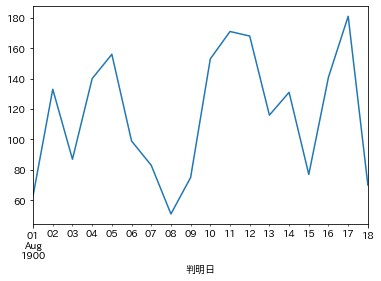

In [ ]:
corona_today.groupby(pandas.Grouper(key='判明日', freq='D')).count()['発症日'].plot()

<h2>居住地についての可視化(今月)</h2>
<pre>
多い順に10件に絞って可視化する.
</pre>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

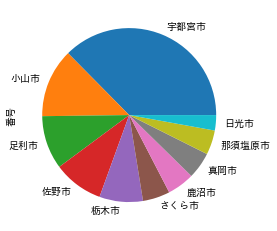

In [ ]:
corona_place=corona_today.groupby('居住地').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_place.plot.pie(subplots=True)

In [ ]:
corona_place

居住地
宇都宮市     643
小山市      220
足利市      171
佐野市      160
栃木市      139
さくら市      87
鹿沼市       87
真岡市       85
那須塩原市     78
日光市       49
Name: 番号, dtype: int64

<h2>年齢についての可視化(今月)</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

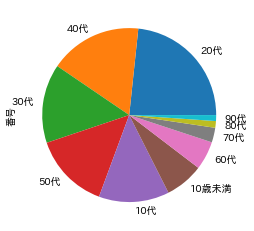

In [ ]:
corona_nen=corona_today.groupby('年代').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_nen.plot.pie(subplots=True)

In [ ]:
corona_nen

年代
20代      488
40代      359
30代      307
50代      297
10代      274
10歳未満    150
60代      111
70代       57
80代       26
90代       23
Name: 番号, dtype: int64

<h2>性別についての可視化(今月)</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

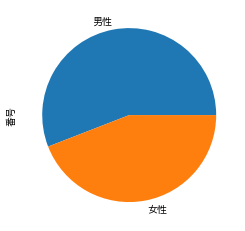

In [ ]:
corona_sei=corona_today.groupby('性別').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_sei.plot.pie(subplots=True)